In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d moazeldsokyx/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/moazeldsokyx/dogs-vs-cats
License(s): CC0-1.0
100% 815M/817M [00:48<00:00, 20.3MB/s]
100% 817M/817M [00:48<00:00, 17.7MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    directory = '/content/dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

test_ds = image_dataset_from_directory(
    directory = '/content/dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 12461 files belonging to 2 classes.


In [ ]:
import tensorflow as tf

def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), 1, padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=2, padding='valid'))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), 1, padding='valid', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2, padding='valid'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 87s 138ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 1.6175 - val_accuracy: 0.7444
Epoch 2/10
625/625 [==============================] - 84s 133ms/step - loss: 0.0247 - accuracy: 0.9945 - val_loss: 1.5154 - val_accuracy: 0.7405
Epoch 3/10
625/625 [==============================] - 82s 131ms/step - loss: 0.0280 - accuracy: 0.9938 - val_loss: 1.8810 - val_accuracy: 0.7318
Epoch 4/10
625/625 [==============================] - 84s 135ms/step - loss: 0.0176 - accuracy: 0.9950 - val_loss: 1.8222 - val_accuracy: 0.7281
Epoch 5/10
625/625 [==============================] - 84s 134ms/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 1.8225 - val_accuracy: 0.7384
Epoch 6/10
625/625 [==============================] - 82s 130ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 1.8700 - val_accuracy: 0.7310
Epoch 7/10
625/625 [==============================] - 82s 131ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 1.6882 - val_ac

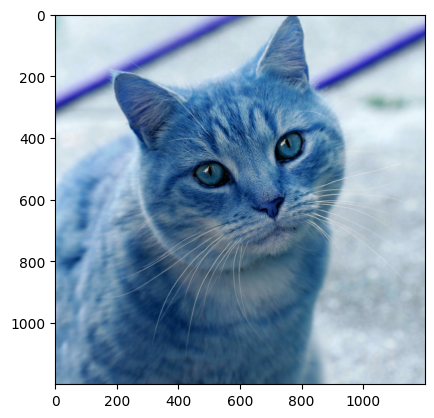

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/Cat03.jpg')
plt.imshow(img)
plt.show()

In [ ]:
image = cv2.resize(img, (256, 256))
image = image.reshape(1, 256, 256, 3)

result = model.predict(image)

if result[0][0] > 0.5:
    print('It is a Cat')
else:
    print('It is aDog')

1/1 [==============================] - 0s 357ms/step
It is a Cat
